# Assignment 2

Name : Ashwin Kharat

Rollno : 241310004

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import sympy as sp

## Q1.  Monte-Carlo Integration:

Compute the integrals using the Monte Carlo method and explain the results.


In [26]:
def monte_carlo(func_exp,a,b,n):
    x = sp.symbols('x')
    func = sp.lambdify(x, func_exp, 'numpy') 

    count = 0
    try : 
        x_rand = np.random.uniform(a,b,n)
        y_rand = np.random.uniform(0,max(func(a), func(b)),n)
    except:
        print("Error in the function , Infinities somewhere")
        return None

    x_undercurve = []
    y_undercurve = []
    x_overcurve = []
    y_overcurve = []

    for i in range(n):
        if y_rand[i] <= func(x_rand[i]):
            count += 1
            x_undercurve.append(x_rand[i])
            y_undercurve.append(y_rand[i])
        else:
            x_overcurve.append(x_rand[i])
            y_overcurve.append(y_rand[i])

    xline = np.linspace(a, b, 100)
    yline = func(xline)
    plt.plot(x_overcurve, y_overcurve, 'ro', label='Over curve')
    plt.plot(x_undercurve, y_undercurve, 'bo', label='Under curve')
    plt.plot(xline, yline , "-k", label= f' f(x) =  {func_exp} ')
    plt.legend()
    
    return count/n * (b - a) * max(func(b),func(a))


def monte_carlo_parts_adv(func_exp,a,b,n):
    # it will creat many[itter] intervals between a and b and then calculate the integral of each interval and then sum them up
    itter = 5
    h = (b-a)/itter
    I = 0
    for i in range(itter):
        I += monte_carlo2(func_exp,a+i*h,a+(i+1)*h,n)
        #print(i)
    return I

def monte_carlo_ashwin_advance(func_exp,a,b,n):
    # This function uses the way function changes and then defines the intervals accordingly.
    x = sp.symbols('x')
    func = sp.lambdify(x, func_exp, 'numpy')

    xline = np.linspace(a, b, 100)
    currentval = func(a)
    
    intervals = [a]
    lim = 50
    factor = 10
    for i in xline:
        if currentval > factor*func(i) or currentval  < func(i)/factor:
            currentval = func(i)
            intervals.append(i)
            lim -= 1
        if lim < 0:
            break
    intervals.append(b)

    I = 0
    n=1000
    for i in range(len(intervals)-1):
        I += monte_carlo2(func_exp,intervals[i],intervals[i+1] , n)
        #print(i)
    return I


def monte_carlo2(func_exp,a,b,n):
    x = sp.symbols('x')
    func = sp.lambdify(x, func_exp, 'numpy') 

    count = 0
    try : 
        x_rand = np.random.uniform(a,b,n)
        y_rand = np.random.uniform(0,max(func(a), func(b)),n)
    except:
        print("Error in the function , Infinities somewhere")
        return None

    x_undercurve = []
    y_undercurve = []
    x_overcurve = []
    y_overcurve = []

    sum_fuc = 0

    for i in range(n):
        sum_fuc = sum_fuc + func(x_rand[i])
        if y_rand[i] <= func(x_rand[i]):
            count += 1
            x_undercurve.append(x_rand[i])
            y_undercurve.append(y_rand[i])
        else:
            x_overcurve.append(x_rand[i])
            y_overcurve.append(y_rand[i])

    xline = np.linspace(a, b, 100)
    yline = func(xline)
    plt.plot(x_overcurve, y_overcurve, 'ro', label='Over curve')
    plt.plot(x_undercurve, y_undercurve, 'bo', label='Under curve')
    plt.plot(xline, yline , "-k", label= f' f(x) =  {func_exp} ')
    plt.legend()
    
    return (b - a) * sum_fuc/n








### a.

\begin{equation*} 
\quad I_1 = \int_0^1 \sqrt{x} \, dx = \frac{2}{3}, 
\end{equation*}


Integral of sqrt(x) from 0 to 1 for n = 1000 is  = 0.6621497508972553
True value of integral of sqrt(x) from 0 to 1 is  = 2/3
Error in the value of integral is = 0.00451691576941138


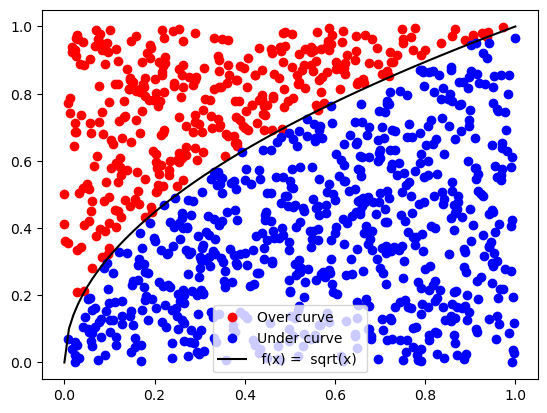

In [27]:


x = sp.symbols('x')
func_exp = sp.sqrt(x)

a = 0
b = 1
n = 1000
h = (b-a)/n

I1 = monte_carlo2(func_exp,a,b,n)

true_value = sp.integrate(func_exp, (x,a,b))

error_value = abs(I1 - true_value)

print(f"Integral of {func_exp} from {a} to {b} for n = {n} is  = {I1}")
print(f"True value of integral of {func_exp} from {a} to {b} is  = {true_value}")
print(f"Error in the value of integral is = {error_value}")



Integral of sqrt(x) from 0 to 1 for n = 1000 is  = 0.6673956976406995
True value of integral of sqrt(x) from 0 to 1 is  = 2/3
Error in the value of integral is = 0.000729030974032874


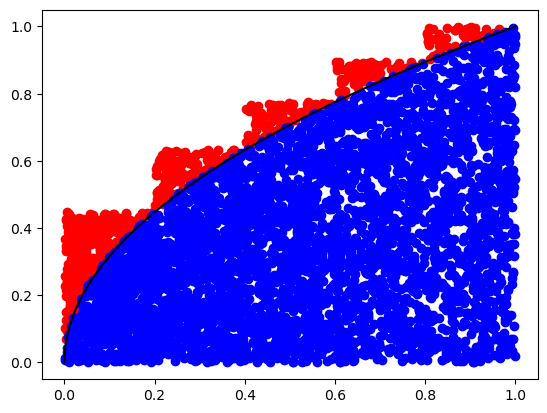

Integral of sqrt(x) from 0 to 1 for n = 1000 is  = 0.6769069628324674
True value of integral of sqrt(x) from 0 to 1 is  = 2/3
Error in the value of integral is = 0.0102402961658008


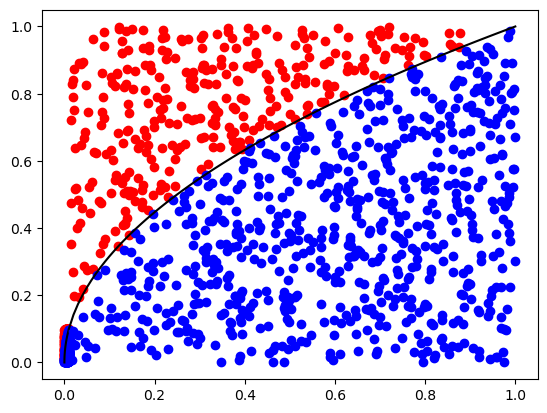

In [28]:

I1 = monte_carlo_parts_adv(func_exp,a,b,n)

true_value = sp.integrate(func_exp, (x,a,b))

error_value = abs(I1 - true_value)

print(f"Integral of {func_exp} from {a} to {b} for n = {n} is  = {I1}")
print(f"True value of integral of {func_exp} from {a} to {b} is  = {true_value}")
print(f"Error in the value of integral is = {error_value}")
plt.legend().set_visible(False)
plt.show()


plt.figure()
I1 = monte_carlo_ashwin_advance(func_exp,a,b,n)

true_value = sp.integrate(func_exp, (x,a,b))

error_value = abs(I1 - true_value)

print(f"Integral of {func_exp} from {a} to {b} for n = {n} is  = {I1}")
print(f"True value of integral of {func_exp} from {a} to {b} is  = {true_value}")
print(f"Error in the value of integral is = {error_value}")
plt.legend().set_visible(False)
plt.show()



### b.


\begin{equation*}
 \quad I_2 = \int_0^1 \frac{1}{\sqrt{x}} \, dx = 2,
\end{equation*}


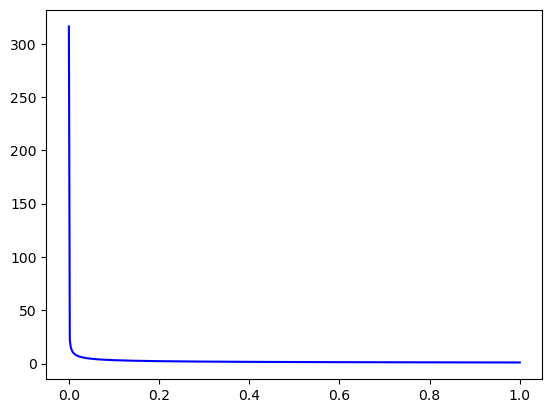

Integral of 1/sqrt(x) from 1e-05 to 1 for n = 100000 is  = 1.9857039620041896
True value of integral of 1/sqrt(x) from 1e-05 to 1 is  = 1.99367544467966
Error in the value of integral is = 0.00797148267547354


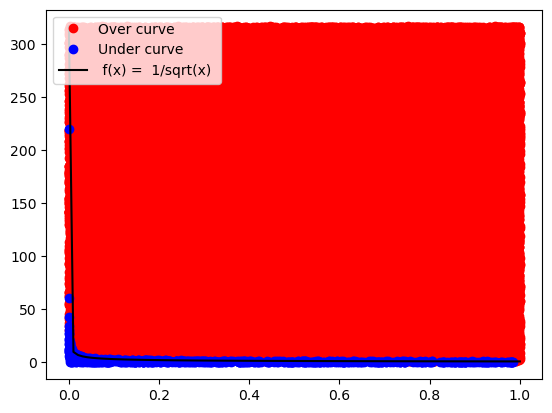

In [29]:


x = sp.symbols('x')
func_exp = 1/sp.sqrt(x)

a = 1e-5
b = 1
n = 100000
h = (b-a)/n

func = sp.lambdify(x, func_exp, 'numpy')

x_vals = np.linspace(a, b, 500)
y_vals = func(x_vals)
plt.plot(x_vals, y_vals, label=r"$f(x) = \frac{1}{\sqrt{x}}$", color="blue")
plt.show()

I2 = monte_carlo2(func_exp,a,b,n)

true_value = sp.integrate(func_exp, (x,a,b))

error_value = abs(I2 - true_value)

print(f"Integral of {func_exp} from {a} to {b} for n = {n} is  = {I2}")
print(f"True value of integral of {func_exp} from {a} to {b} is  = {true_value}")
print(f"Error in the value of integral is = {error_value}")



Integral of 1/sqrt(x) from 1e-05 to 1 for n = 100000 is  = 1.9953651968073594
True value of integral of 1/sqrt(x) from 1e-05 to 1 is  = 1.99367544467966
Error in the value of integral is = 0.00168975212769618


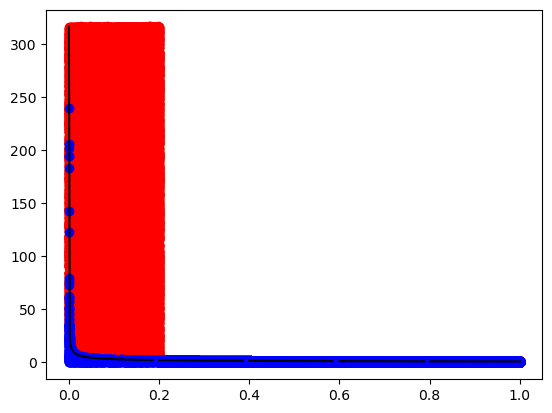

Integral of 1/sqrt(x) from 1e-05 to 1 for n = 100000 is  = 1.954642247703637
True value of integral of 1/sqrt(x) from 1e-05 to 1 is  = 1.99367544467966
Error in the value of integral is = 0.0390331969760263


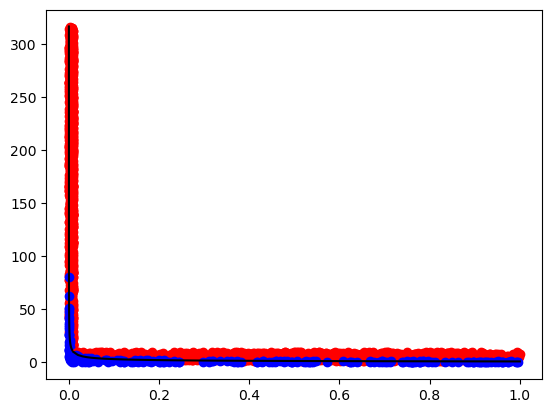

In [30]:

I2 = monte_carlo_parts_adv(func_exp,a,b,n)

true_value = sp.integrate(func_exp, (x,a,b))

error_value = abs(I2 - true_value)

print(f"Integral of {func_exp} from {a} to {b} for n = {n} is  = {I2}")
print(f"True value of integral of {func_exp} from {a} to {b} is  = {true_value}")
print(f"Error in the value of integral is = {error_value}")
plt.legend().set_visible(False)
plt.show()


plt.figure()
I2 = monte_carlo_ashwin_advance(func_exp,a,b,n)

true_value = sp.integrate(func_exp, (x,a,b))

error_value = abs(I2 - true_value)

print(f"Integral of {func_exp} from {a} to {b} for n = {n} is  = {I2}")
print(f"True value of integral of {func_exp} from {a} to {b} is  = {true_value}")
print(f"Error in the value of integral is = {error_value}")
plt.legend().set_visible(False)
plt.show()



### c. 

\begin{equation*}
 \quad I_3 = \int_0^1 \frac{1}{\sqrt{x^{3/2}}} \, dx = 4,
\end{equation*}

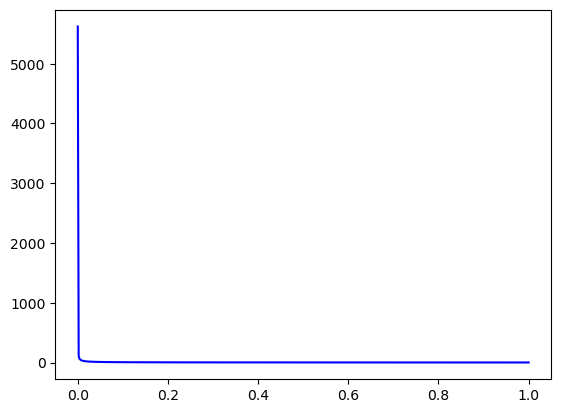

Integral of x**(-0.75) from 1e-05 to 1 for n = 1000 is  = 3.5236317732023217
True value of integral of x**(-0.75) from 1e-05 to 1 is  = 3.77506346992386
Error in the value of integral is = 0.251431696721539


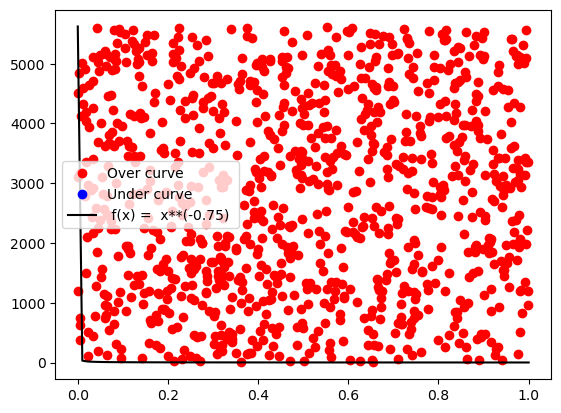

In [31]:


x = sp.symbols('x')
func_exp = x**(-3/4)

a = 1e-5
b = 1
n = 1000
h = (b-a)/n

func = sp.lambdify(x, func_exp, 'numpy')

x_vals = np.linspace(a, b, 500) 
y_vals = func(x_vals)
plt.plot(x_vals, y_vals, label=r"$f(x) = \frac{1}{\sqrt{x}}$", color="blue")
plt.show()

I3 = monte_carlo2(func_exp,a,b,n)

true_value = sp.integrate(func_exp, (x,a,b))

error_value = abs(I3 - true_value)

print(f"Integral of {func_exp} from {a} to {b} for n = {n} is  = {I3}")
print(f"True value of integral of {func_exp} from {a} to {b} is  = {true_value}")
print(f"Error in the value of integral is = {error_value}")



Integral of x**(-0.75) from 1e-05 to 1 for n = 1000 is  = 3.7720942481663133
True value of integral of x**(-0.75) from 1e-05 to 1 is  = 3.77506346992386
Error in the value of integral is = 0.00296922175754721


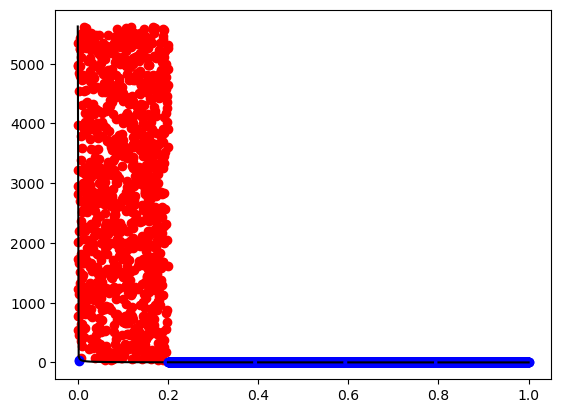

Integral of x**(-0.75) from 1e-05 to 1 for n = 1000 is  = 3.710981342385886
True value of integral of x**(-0.75) from 1e-05 to 1 is  = 3.77506346992386
Error in the value of integral is = 0.0640821275379744


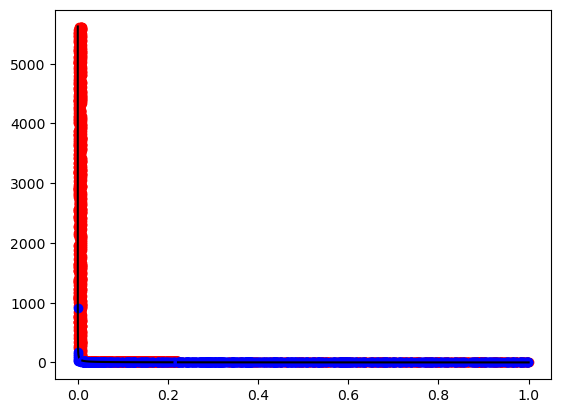

In [32]:

I3 = monte_carlo_parts_adv(func_exp,a,b,n)

true_value = sp.integrate(func_exp, (x,a,b))

error_value = abs(I3 - true_value)

print(f"Integral of {func_exp} from {a} to {b} for n = {n} is  = {I3}")
print(f"True value of integral of {func_exp} from {a} to {b} is  = {true_value}")
print(f"Error in the value of integral is = {error_value}")
plt.legend().set_visible(False)
plt.show()

plt.figure()
I3 = monte_carlo_ashwin_advance(func_exp,a,b,n)
true_value = sp.integrate(func_exp, (x,a,b))
error_value = abs(I3 - true_value)

print(f"Integral of {func_exp} from {a} to {b} for n = {n} is  = {I3}")
print(f"True value of integral of {func_exp} from {a} to {b} is  = {true_value}")
print(f"Error in the value of integral is = {error_value}")
plt.legend().set_visible(False)
plt.show()


## Q2. Numerical Root Finding

Find all the roots of the following equation using the Newton-Raphson Method:


$$ (x - a)^2 \left( 1 + \frac{x - b}{a - b} \right) + \alpha (x - b)^2 \left( 1 + \frac{x - a}{b - a} \right) = 0 $$

Try starting with values \( x = a \) or \( x = b \). Use $ \alpha = \pm 1 $,  $a = 1 $, and $ b = 2 $.

Prove that, if no round off error, then the iteration will keep oscillating between x=a and x=b

In [33]:
x = sp.symbols('x')
a = sp.symbols('a')
b = sp.symbols('b')
alpha = sp.symbols('alpha')

func_exp = (x-a)**2 * (1+(x-b)/(a-b)) + alpha*(x-b)**2 * (1+ (x-a)/(b-a))

func_exp

func_exp_d1 = sp.diff(func_exp,x)



In [34]:
from scipy.optimize import newton

x = sp.symbols('x')
a, b, alpha = sp.symbols('a b alpha')

a,b,alpha = 1,2,-1

func_exp = (x - a)**2 * (1 + (x - b) / (a - b)) + alpha * (x - b)**2 * (1 + (x - a) / (b - a))

func_exp_d1 = sp.diff(func_exp, x)

func = sp.lambdify(x, func_exp, 'numpy')
func_prime = sp.lambdify(x, func_exp_d1, 'numpy')

a_val = 0
b_val = 2.6

x0_a = a_val
x0_b = b_val

try:
    root_from_a = newton(func, x0_a, fprime=func_prime)
    root_from_b = newton(func, x0_b, fprime=func_prime)
except RuntimeError as e:
    print(f"Error finding root: {e}")

print(f"Root starting from x = a: {root_from_a}")
print(f"Root starting from x = b: {root_from_b}")



Root starting from x = a: 0.38196601125010515
Root starting from x = b: 2.618033988749895


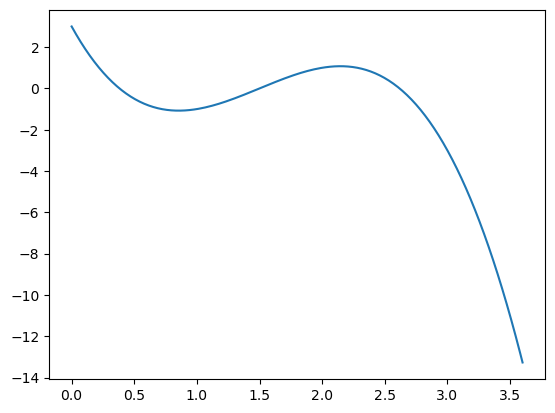

In [35]:
xline = np.linspace(a_val, b_val+1, 200)
yline = func(xline)
plt.plot(xline, yline, label='f(x)')

In [36]:
func_prime(2)

1

## Q3. Ordinary Differential Equation & it’s Stability:
 

### (a) Consider a initial value problem $y' = y + t - t^3$, $y(0) = 5$. Suppose we use Euler’s method with step size $h$ to compute the approximation solution $y = y(t_i)$; $t_j = jh$. Find an explicit formula for $y_i$ and obtain the truncation error. Show that for a fixed value of $t$, the error goes to zero as $h \to 0$. 

In [37]:
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')(t)

diff_eq = sp.Eq(sp.Derivative(y, t), y + t - t**3)

solution = sp.dsolve(diff_eq, y)

print(f"General Solution : {solution}")

ics = {y.subs(t, 0): 5}

particular_solution = sp.dsolve(diff_eq, y, ics=ics)

print(f"Particular Solution : {particular_solution}")


General Solution : Eq(y(t), C1*exp(t) + t**3 + 3*t**2 + 5*t + 5)
Particular Solution : Eq(y(t), t**3 + 3*t**2 + 5*t + 5)


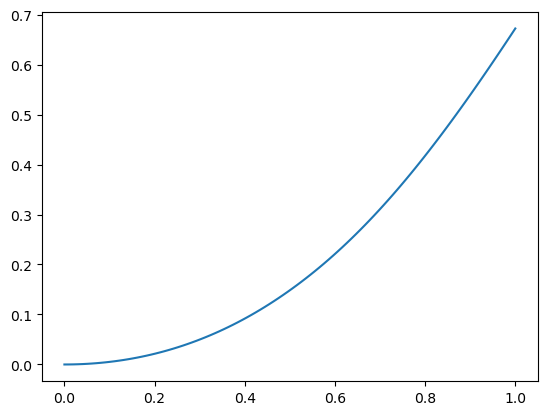

In [38]:
from scipy.integrate import solve_ivp


def dy_dt(y,t):
    return y + t-t**3

y0 = 0
t_line = np.linspace(0,1,100)
sol = solve_ivp(dy_dt,[0,1],[y0],t_eval = t_line)
plt.plot(sol.t,sol.y[0],label = 'y(t)')



In [39]:
def euler(f,intitial):
    [x0,y0,h,b] = intitial
    x = np.linspace(x0,b,int((b-x0)/h))
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(len(x)-1):
        y[i+1] = y[i] + h*f(y[i],x[i])
    return x,y

def numerical_int(f,intitial):
    [x0,y0,h,b] = intitial
    x = np.linspace(x0,b,int((b-x0)/h))
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(len(x)-1):
        y[i+1] = y[i] + 2*h*f(y[i],x[i])
    return x,y


[np.float64(0.1), np.float64(0.01), np.float64(0.001), np.float64(0.0001), np.float64(1e-05), np.float64(1e-06)]
error at t =1 for h = 0.1 is  = 1.9031238327914934
error at t =1 for h = 0.01 is  = 0.2124397156499267
error at t =1 for h = 0.001 is  = 0.021492523156386056
error at t =1 for h = 0.0001 is  = 0.0021517683050458203
error at t =1 for h = 1e-05 is  = 0.00035730636249198255
error at t =1 for h = 1e-06 is  = 2.1520452888168506e-05


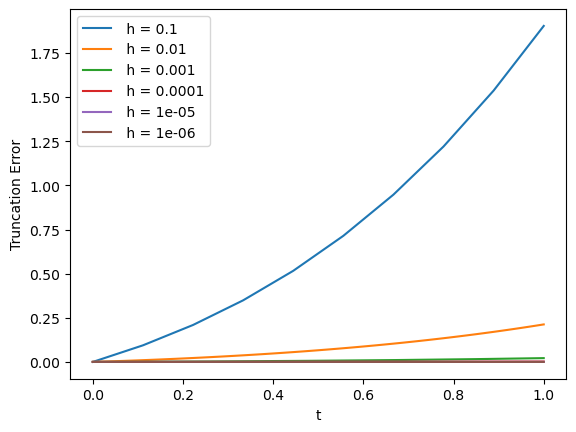

In [40]:
hs = [ 1/(10**x) for x in np.linspace(1,6,6)  ]
#hs = [ 1/(5**x) for x in np.linspace(1,8,8) ]

print(hs)
x0 = 0
y0 = 5
b = 1 
for h in hs:
    initial = [x0,y0,h,b]
    x_ans,y_ans = euler(dy_dt,initial)
    analytical = sp.lambdify(t, particular_solution.rhs,  'numpy' )

    error = abs(analytical(x_ans) - y_ans)
    plt.plot(x_ans,error,label = f" h = {h}")
    print(f'error at t =1 for h = {h} is  = {error[-1]}')

plt.legend()
plt.xlabel("t")
plt.ylabel("Truncation Error")
plt.show()

    

###  (b) Repeat the above exercise for the numerical integration method $y_{j+1} = y_j + 2h y_j'$ and show that the truncation error does not tend to zero as $h \to 0$. Why?


[np.float64(0.1), np.float64(0.01), np.float64(0.001), np.float64(0.0001), np.float64(1e-05), np.float64(1e-06)]
error at t =1 for h = 0.1 is  = 12.64953251994514
error at t =1 for h = 0.01 is  = 22.844299537576568
error at t =1 for h = 0.001 is  = 24.193350705034298
error at t =1 for h = 0.0001 is  = 24.33250574001014
error at t =1 for h = 1e-05 is  = 24.34569623157386
error at t =1 for h = 1e-06 is  = 24.347861313917022


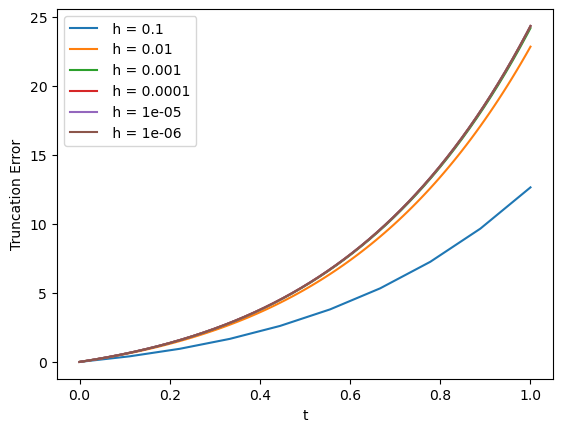

In [41]:
hs = [ 1/(2**x) for x in np.linspace(1,8,8) ]
hs = [ 1/(10**x) for x in np.linspace(1,6,6)  ]

print(hs)
x0 = 0
y0 = 5
b = 1 
for h in hs:
    initial = [x0,y0,h,b]
    x_ans,y_ans = numerical_int(dy_dt,initial)
    analytical = sp.lambdify(t, particular_solution.rhs,  'numpy' )

    error = abs(analytical(x_ans) - y_ans)
    plt.plot(x_ans,error,label = f" h = {h}")
    print(f'error at t =1 for h = {h} is  = {error[-1]}')

plt.legend()
plt.xlabel("t")
plt.ylabel("Truncation Error")
plt.show()

    

## Q 4. Analyse the stability of fourth-order Runge-Kutta Method.

In [42]:
def RK4(f,initial):
    [x,y,h] = initial
    k1 = h*f(y,x)
    k2 = h*f(y + k1/2,x + h/2)
    k3 = h*f(y + k2/2,x + h/2)
    k4 = h*f(y + k3,x + h)
    return y + (k1 + 2*k2 + 2*k3 + k4)/6


In [43]:
l = sp.Symbol('l')
y = sp.Symbol('y')
h = sp.Symbol('h')
x = sp.Symbol('x')

def dydt(y,x):
    l = sp.Symbol('l')
    return l * y

ynp1 = RK4(dydt,[x,y,h])

# from ynp1 take lh as common and substitute as z 
z = sp.Symbol('z')
R = sp.simplify( ynp1.subs(l*h,z) / y )
print(R)


z**4/24 + z**3/6 + z**2/2 + z + 1


/tmp/ipykernel_20130/1665940034.py:12: UserWarning: The following kwargs were not used by contour: 'lable'
  c1 = plt.contourf(X, Y, R_vals, levels=[0, 1], colors=['lightblue'], alpha=0.7, lable = r"Stable region $∣R(z)∣ ≤ 1 $")
/tmp/ipykernel_20130/1665940034.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  c2 = plt.contour(X, Y, R_vals, levels=[1], colors='blue', linewidths=2,label = r" $∣R(z)∣ = 1 $")


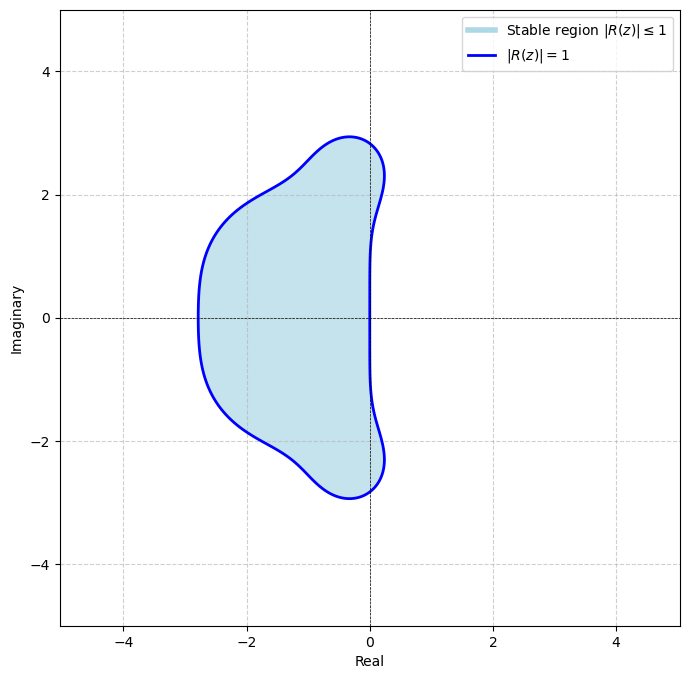

In [44]:
R_z = sp.lambdify(z,R,"numpy")

x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y 

R_vals = np.abs(R_z(Z))

plt.figure(figsize=(8, 8))

c1 = plt.contourf(X, Y, R_vals, levels=[0, 1], colors=['lightblue'], alpha=0.7, lable = r"Stable region $∣R(z)∣ ≤ 1 $")
c2 = plt.contour(X, Y, R_vals, levels=[1], colors='blue', linewidths=2,label = r" $∣R(z)∣ = 1 $")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True, linestyle='--', alpha=0.6)
stable_region_patch = plt.Line2D([0], [0], color='lightblue', lw=4, label=r"Stable region $|R(z)| \leq 1$")
boundary_line_patch = plt.Line2D([0], [0], color='blue', lw=2, label=r"$|R(z)| = 1$")
plt.legend(handles=[stable_region_patch, boundary_line_patch])
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axis('equal')
plt.show()



## Q 5. Richardson Extrapolation: 
Use Richardson extrapolation to estimate the first derivative of $\sin^2{x}$ at $x = \pi/4$ using step sizes of $h_1 = \pi/5$ and $h_2 = \pi/10$. Use centred differences of $O(h_2)$ for the initial estimates.

In [45]:
import sympy as sp

x = sp.symbols("x")

func_exp = sp.sin(x)**2

f_exp_prime = sp.diff(func_exp,x)
print(f_exp_prime)
func_true = sp.lambdify(x,f_exp_prime,'numpy')
print(func_true(np.pi/4))

2*sin(x)*cos(x)
1.0


In [46]:

def func(x):
    return np.sin(x)**2

def centered_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def richardson_extrap(func,initial):
    [x,h1,h2] = initial
    f_prime_h1 = centered_diff(func, x, h1)
    f_prime_h2 = centered_diff(func, x, h2)

    return  (4 * f_prime_h2 - f_prime_h1) / 3



x = np.pi / 4
h1 = np.pi / 5
h2 = np.pi / 10

initial = [x,h1,h2]
ans = richardson_extrap(func,initial)


print(f"Richardson Extrapolation at x = {x:.3f} = : {ans:.6f}")
print(f"True value at x = {x:.3f} = : {func_true(x):.6f}")
print(f"Error at x = {x:.3f} = : {abs(ans - func_true(x)):.6f}")

Richardson Extrapolation at x = 0.785 = : 0.995043
True value at x = 0.785 = : 1.000000
Error at x = 0.785 = : 0.004957


### Q 6. Spline Interpolation

The following table gives the vapour pressure of water as a function of temperature:

| Temperature (°C) | Vapour Pressure (mm of Hg) |
|------------------|----------------------------|
| 0                | 4.579                      |
| 5                | 6.543                      |
| 10               | 9.209                      |
| 15               | 12.788                     |
| 20               | 17.535                     |
| 25               | 23.756                     |
| 30               | 31.824                     |
| 35               | 41.175                     |
| 40               | 55.324                     |

Using the cubic interpolation method, estimate the value of vapour pressure at the following temperatures
 -5, -1, 1, 13, 22, 37,and 45 ,$^\circ$ C

Try to estimate the accuracy of computations and verify the results by comparing them with the known values 3.163, 4.258, 4.926, 11.231, 19.827, 47.067, and 71.88  respectively


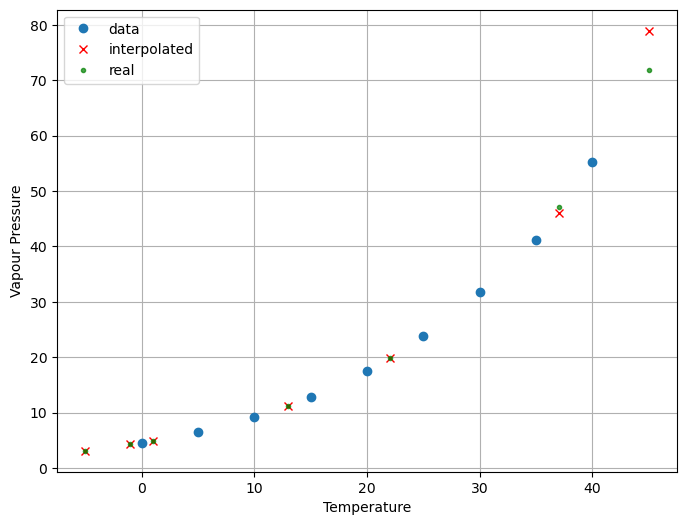

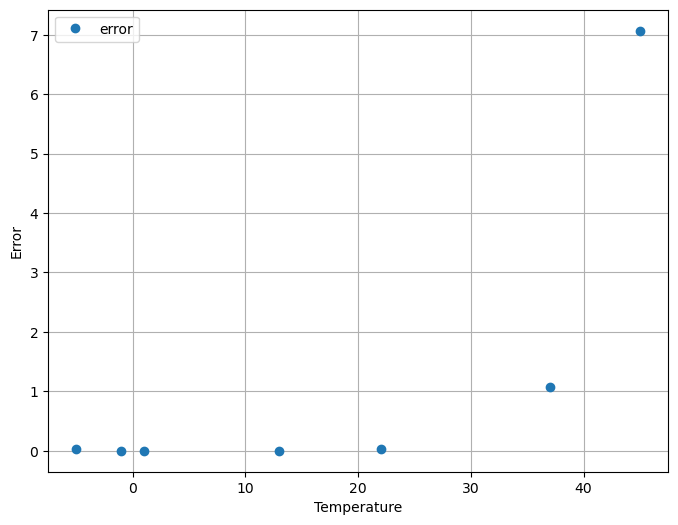

In [47]:
from scipy.interpolate import CubicSpline


Temperature = np.arange(0,45,5)
Vapour_Pressure = [4.579,6.543,9.209,12.788,17.535,23.756,31.824,41.175,55.324]

test_temp = [-5, -1, 1, 13, 22, 37,45]
known_VP = [3.163, 4.258, 4.926, 11.231, 19.827, 47.067 , 71.88]


cs = CubicSpline(Temperature, Vapour_Pressure)

VP = cs(test_temp)

plt.figure(figsize = (8,6))
plt.plot(Temperature, Vapour_Pressure, 'o', label='data')
plt.plot(test_temp, VP, 'x',color = "r", label='interpolated')
plt.plot(test_temp, known_VP, '.',color = "g",alpha = 0.7, label='real')
plt.xlabel('Temperature')
plt.ylabel('Vapour Pressure')
plt.legend()
plt.grid()
plt.show()

error = np.abs(known_VP - VP)
#print(error)

plt.figure(figsize = (8,6))
plt.plot(test_temp, error, 'o', label='error')
plt.xlabel('Temperature')
plt.ylabel('Error')
plt.legend()
plt.grid()


# -- **THE END** --